In [567]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom,norm,uniform,multivariate_normal
import pandas as pd
import corner
import pymc3 as pm
%matplotlib inline

### Normality

In models, normality arises from the acceptance that we are ignorant about the underlying process, and our only assumption is that the variance of the data is finite.

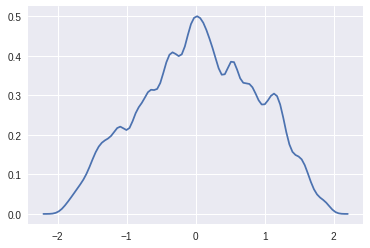

In [103]:
steps=2
nwalkers=1000

end=[(np.random.uniform(-1,1,steps)).sum() for i in range(nwalkers)]

sns.kdeplot(np.array(end),bw=0.1)

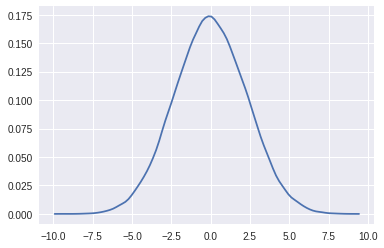

In [98]:
steps=16
nwalkers=100000
end=[(np.random.uniform(-1,1,steps)).sum() for i in range(nwalkers)]
sns.kdeplot(np.array(end),bw=0.1)

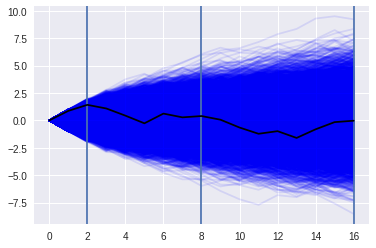

In [99]:
hist1=[]
hist2=[]
hist3=[]
stlist=[2,8,16]
for k in range(10000):
    cloc=0 #current location
    where=[0]
    for i in range(stlist[2]):
        cloc+=np.random.uniform(-1,1)
        where+=[cloc]
        if i==stlist[0]-1:
            hist1+=[cloc]
        if i==stlist[1]-1:
            hist2+=[cloc]
        if i==stlist[2]-1:
            hist3+=[cloc]
    plt.plot(where,c='b',alpha=0.1)
for st in stlist:
    plt.axvline(st)
plt.plot(where,c='k')


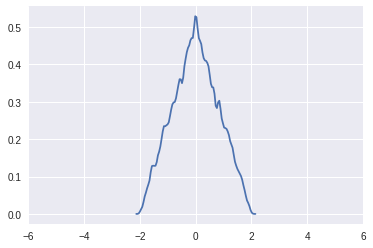

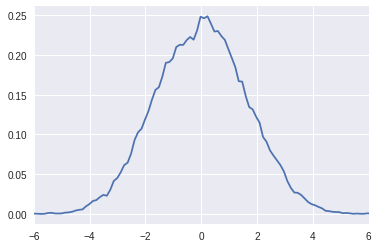

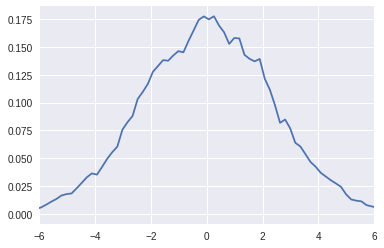

In [100]:
bw=0.05
sns.kdeplot(np.array(hist1),bw=bw)
plt.xlim(-6,6)
plt.show()
sns.kdeplot(np.array(hist2),bw=bw)
plt.xlim(-6,6)
plt.show()
sns.kdeplot(np.array(hist3),bw=bw)
plt.xlim(-6,6)
plt.show()

In [105]:
(np.random.uniform(0,0.1,12)+1).prod()

1.6951088123758122

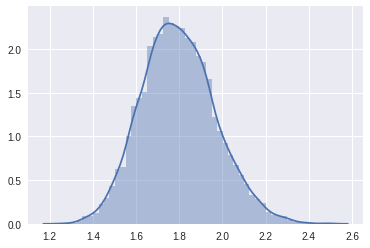

In [30]:
growth=[(np.random.uniform(0,0.1,12)+1).prod() for i in range(10000)]
sns.distplot(growth) #small effects that are multiplied together can be approximated as sums

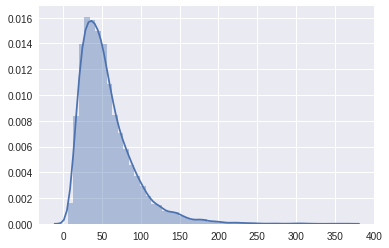

In [106]:
gbig=[(np.random.uniform(0,0.8,12)+1).prod() for i in range(10000)]
sns.distplot(gbig)

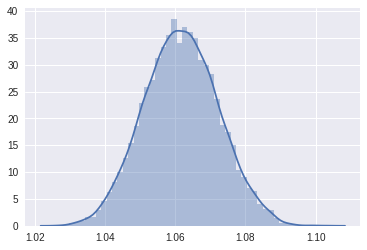

In [35]:
gsmall=[(np.random.uniform(0,0.01,12)+1).prod() for i in range(10000)]
sns.distplot(gsmall)

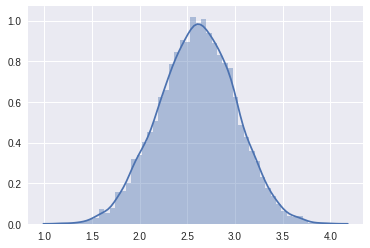

In [36]:
glog=[np.log((np.random.uniform(0,0.5,12)+1).prod()) for i in range(10000)]
sns.distplot(glog)  # normal by log-multiplication

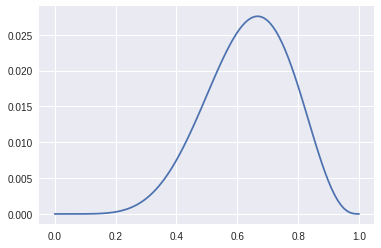

In [47]:
w=6
n=9
p_grid=np.linspace(0,1,100)
prior=1 # uniform between 0 and 1
posterior=binom.pmf(w,n,p_grid)*prior
posterior=posterior/posterior.sum()
plt.plot(p_grid,posterior)

In [51]:
url="https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv"
ds=pd.read_csv(url,sep=';')

In [54]:
ds.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


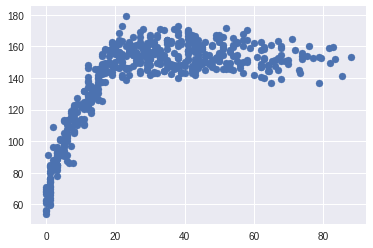

In [109]:
plt.scatter(ds.age,ds.height)

(array([  11.,   18.,   29.,   25.,   30.,   33.,   32.,  181.,  162.,   23.]),
 array([  53.975 ,   66.4845,   78.994 ,   91.5035,  104.013 ,  116.5225,
         129.032 ,  141.5415,  154.051 ,  166.5605,  179.07  ]),
 <a list of 10 Patch objects>)

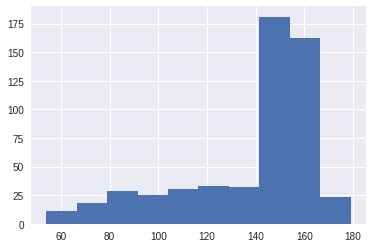

In [111]:
plt.hist(ds.height)

In [57]:
len(ds)

544

In [55]:
ds2=ds[ds.age>=18]

In [58]:
len(ds2)

352

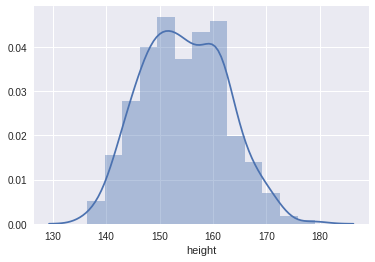

In [110]:
sns.distplot(ds2.height)

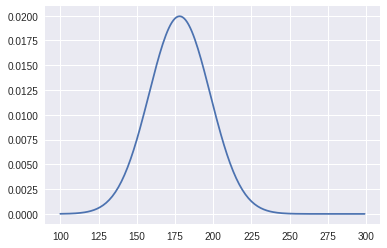

In [126]:
x=np.arange(100,300)
plt.plot(x,norm.pdf(x,178,20)) # prior on height mean

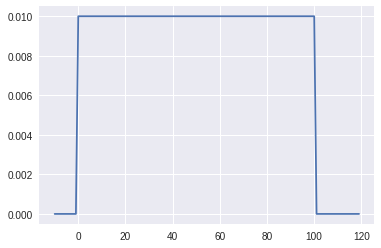

In [129]:
sx=np.arange(-10,120)
plt.plot(sx,uniform.pdf(sx,0,100)) # prior on variance of height

In [263]:
nsamp=10000
sample_sigma=np.random.uniform(50,0,nsamp)
sample_mu=np.random.normal(178,20,nsamp)

In [264]:
sample_sigma[0]

43.462674792627936

In [265]:
sample_mu[0]

156.18966375010865

In [266]:
np.random.normal(sample_mu[0],sample_sigma[0])

215.05052921975616

In [267]:
prior_h=np.random.normal(sample_mu,sample_sigma)

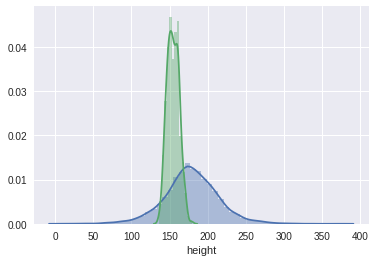

In [268]:
sns.distplot(prior_h)
sns.distplot(ds2.height)

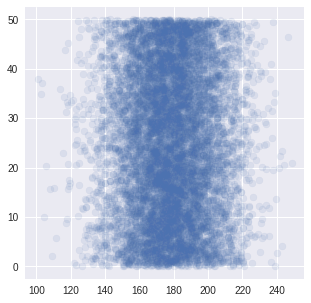

In [269]:
plt.figure(figsize=(5,5))
plt.scatter(sample_mu,sample_sigma,alpha=0.1)

In [270]:
mu_l=np.linspace(140,160,200)
sigma_l=np.linspace(4,9,200)

In [287]:
mu,sigma=np.meshgrid(mu_l, sigma_l)

In [303]:
log_like=np.sum([norm.logpdf(h,mu,sigma) for h in ds2.height],axis=0)

In [308]:
log_priors=norm.logpdf(mu,178,20)+uniform.logpdf(sigma,0,50)

In [309]:
log_post=log_like+log_priors

In [312]:
post=np.exp(log_post-log_post.max())

(7, 8.5)

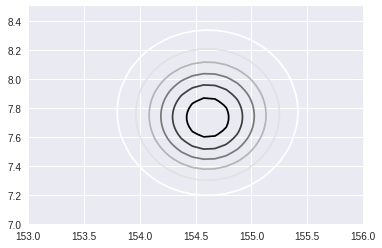

In [316]:
plt.contour(mu,sigma,post)
plt.xlim(153,156)
plt.ylim(7,8.5)

(7, 8.5)

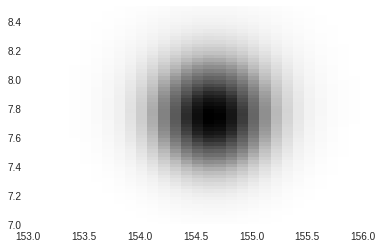

In [317]:
plt.pcolormesh(mu,sigma,post)
plt.xlim(153,156)
plt.ylim(7,8.5)

In [330]:
p=(post/post.sum()).ravel()

In [340]:
draw_idx=np.random.choice(range(len(p)),replace=True, size=10000,  p=p)

In [341]:
mu_sample=mu.ravel()[draw_idx]
sigma_sample=sigma.ravel()[draw_idx]

In [345]:
len(mu_sample)

10000

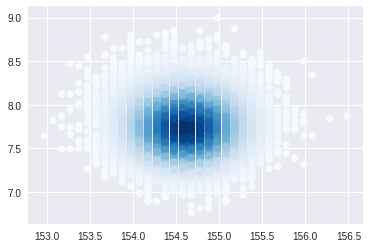

In [346]:
plt.scatter(mu_sample,sigma_sample,c=p[draw_idx],cmap='Blues')

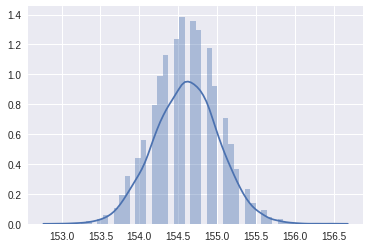

In [347]:
sns.distplot(mu_sample)

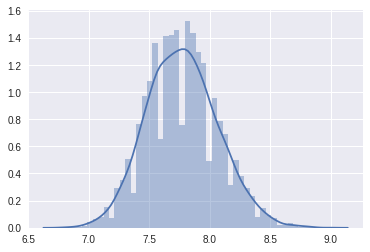

In [348]:
sns.distplot(sigma_sample)

In [373]:
np.vstack((mu_sample,sigma_sample)).T

array([[ 154.87437186,    8.12060302],
       [ 155.47738693,    7.59296482],
       [ 154.07035176,    7.71859296],
       ..., 
       [ 154.57286432,    7.44221106],
       [ 155.27638191,    7.61809045],
       [ 155.27638191,    7.54271357]])

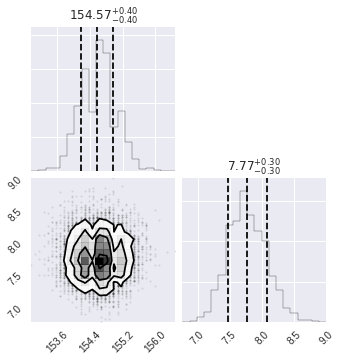

In [379]:
corner.corner(np.vstack((mu_sample,sigma_sample)).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [825]:
def hpdi(samples,cred_mass,plot=True):
    x=np.sort(samples)
    n = len(x)

    interval_idx_inc = int(np.floor(cred_mass * n))
    n_intervals = n - interval_idx_inc
    interval_width = x[interval_idx_inc:] - x[:n_intervals]

    if len(interval_width) == 0:
        raise ValueError('Too few elements for interval calculation')

    min_idx = np.argmin(interval_width)
    hdi_min = x[min_idx]
    hdi_max = x[min_idx + interval_idx_inc]
    
    quantiles=[hdi_min, hdi_max]
    if plot:
        points = sns.kdeplot(samples, shade=True,bw=0.05).get_lines()[0].get_data()
        x = points[0]
        y = points[1]
        print(hdi_min, hdi_max)
        plt.fill_between(x,y, where = (x>=quantiles[0]) & (x<=quantiles[1]), color='b')
        plt.ylabel('Sampled Posterior')
        plt.xlabel('$p$')
        plt.title('HDPI at '+str(int(cred_mass*100))+'%') 
    return(hdi_min, hdi_max)

7.46733668342 8.02010050251


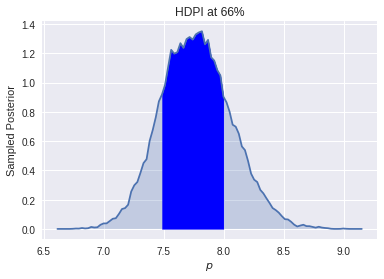

In [369]:
hpdi(sigma_sample,0.66)

154.271356784 154.974874372


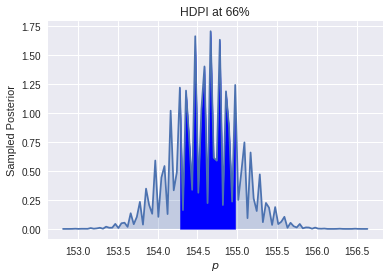

In [370]:
hpdi(mu_sample,0.66)

In [380]:
h3=np.random.choice(ds2.height,20)

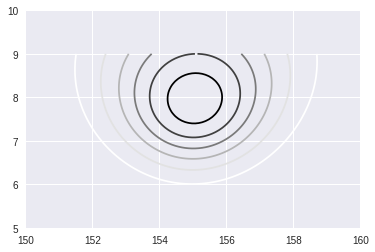

In [389]:
log_like=np.sum([norm.logpdf(h,mu,sigma) for h in h3],axis=0)
log_post=log_like+log_priors
post=np.exp(log_post-log_post.max())
plt.contour(mu,sigma,post)
plt.xlim(150,160)
plt.ylim(5,10)
plt.show()

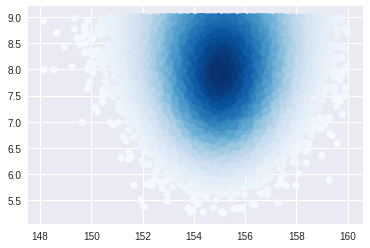

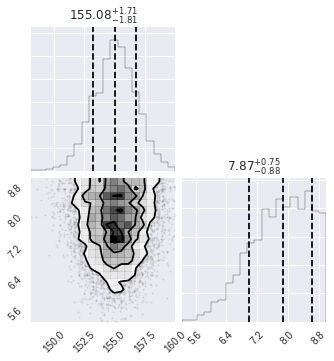

In [390]:
p=(post/post.sum()).ravel()
draw_idx=np.random.choice(range(len(p)),replace=True, size=10000,  p=p)
mu_sample=mu.ravel()[draw_idx]
sigma_sample=sigma.ravel()[draw_idx]
plt.scatter(mu_sample,sigma_sample,c=p[draw_idx],cmap='Blues')
plt.show()
corner.corner(np.vstack((mu_sample,sigma_sample)).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

7.34170854271 8.84924623116


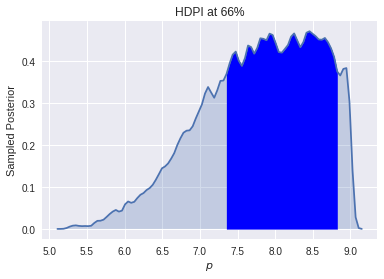

In [391]:
hpdi(sigma_sample,0.66)

In [590]:
with pm.Model() as h_model:
    mu = pm.Normal('mu', mu=178, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds2.height)


In [591]:
with h_model:
    MAP=pm.find_MAP()
    HES=pm.find_hessian(MAP)

logp = -1,235.2, ||grad|| = 11.697: 100%|██████████| 19/19 [00:00<00:00, 3205.75it/s]  


In [592]:
print(MAP['mu'],MAP['sigma'])

154.60702358123825 7.731333025102713


In [630]:
VCOV=1/HES
print(VCOV[0,0]**0.5,VCOV[1,1]**0.5) # sigma_sigma apparently does not agree with book

0.411993992667 0.044570993434


In [631]:
VCOV # weird covariance matrix, possible scaling issues

array([[  1.69739050e-01,  -1.01133722e+01],
       [ -1.01133722e+01,   1.98657346e-03]])

In [560]:
with h_model:
    trace_h = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4043.92draws/s]


In [561]:
1/pm.find_hessian(MAP,model=h_model)

array([[  1.69739050e-01,  -1.01133722e+01],
       [ -1.01133722e+01,   1.98657346e-03]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c4fbe470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7db752240>]], dtype=object)

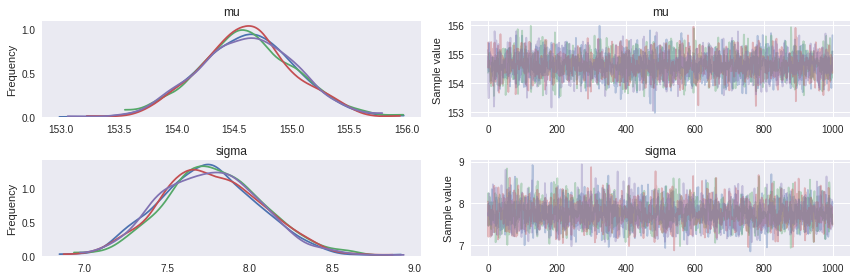

In [562]:
pm.traceplot(trace_h)

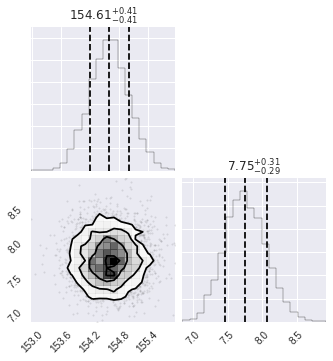

In [563]:
corner.corner(np.vstack((trace_h['mu'],trace_h['sigma'])).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [564]:
pm.summary(trace_h, alpha=.32).round(2)

,mean,sd,mc_error,hpd_16,hpd_84,n_eff,Rhat
mu,154.61,0.41,0.01,154.24,155.05,4573.53,1.0
sigma,7.76,0.30,0.00,7.47,8.06,4330.71,1.0


In [565]:
trace_df = pm.trace_to_dataframe(trace_h)
trace_df.cov()

,mu,sigma
mu,0.170393,0.000694
sigma,0.000694,0.090152


In [582]:
trace_df.mean()

mu       154.609160
sigma      7.763688
dtype: float64

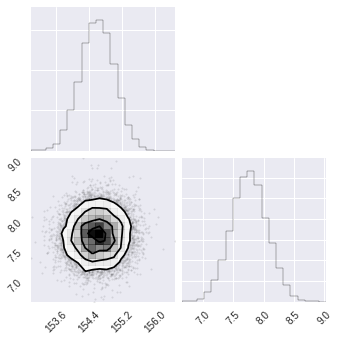

In [602]:
samps_quad=multivariate_normal.rvs(mean=trace_df.mean(), cov=trace_df.cov(), size=10000)
corner.corner(samps_quad)
plt.show()

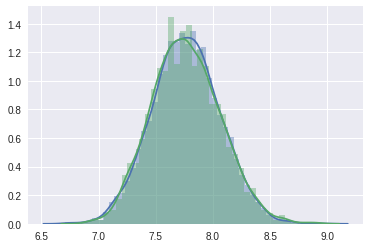

In [604]:
sns.distplot(samps_quad[:,1])
sns.distplot(trace_h['sigma'])

In [518]:
with pm.Model() as h_model:
    mu = pm.Normal('mu', mu=178, sd=0.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds2.height)
    trace_h = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4349.71draws/s]


In [519]:
pm.summary(trace_h, alpha=.32).round(2)

,mean,sd,mc_error,hpd_16,hpd_84,n_eff,Rhat
mu,177.86,0.10,0.00,177.76,177.96,3801.93,1.0
sigma,24.59,0.92,0.02,23.68,25.51,3778.48,1.0


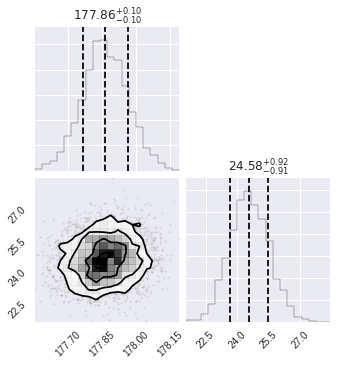

In [520]:
corner.corner(np.vstack((trace_h['mu'],trace_h['sigma'])).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [645]:
with pm.Model() as h_model_logs:
    mu = pm.Normal('mu', mu=178, sd=20)
    log_sigma = pm.Normal('log_sigma', mu=2, sd=10)
    height = pm.Normal('height', mu=mu, sd=np.exp(log_sigma), observed=ds2.height)
    trace_h_ls = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_sigma, mu]
INFO:pymc3:NUTS: [log_sigma, mu]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:01<00:00, 4342.27draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c4a4eda0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c454fb38>]], dtype=object)

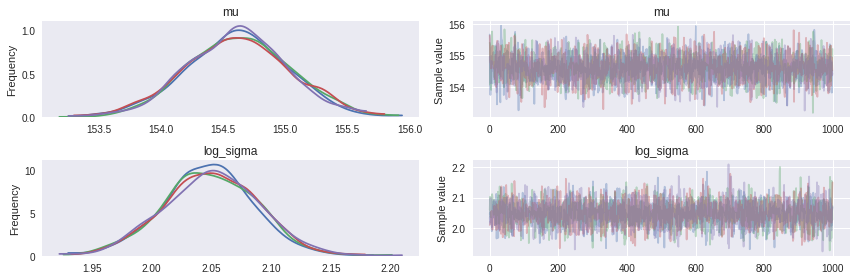

In [646]:
pm.traceplot(trace_h_ls)

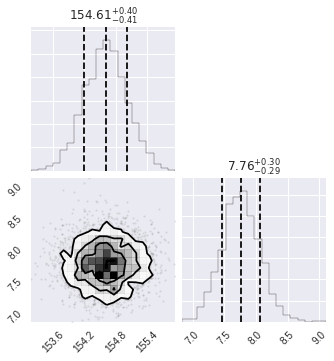

In [648]:
corner.corner(np.vstack((trace_h_ls['mu'],np.exp(trace_h_ls['log_sigma']))).T,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

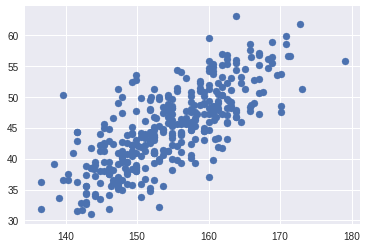

In [649]:
plt.scatter(ds2.height,ds2.weight)

In [651]:
with pm.Model() as pred_model:
    a=pm.Normal('a',mu=156,sd=100)
    b=pm.Normal('b',mu=0,sd=10)
    mu=a+b*ds2.weight
    sigma=pm.Uniform('sigma',lower=0,upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds2.height)
    trace_pred = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:06<00:00, 1160.77draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c5685470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc7c232b048>]], dtype=object)

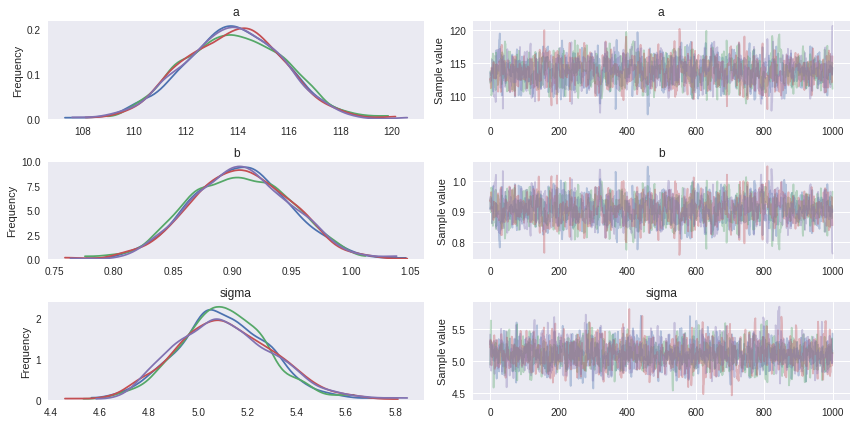

In [652]:
pm.traceplot(trace_pred)

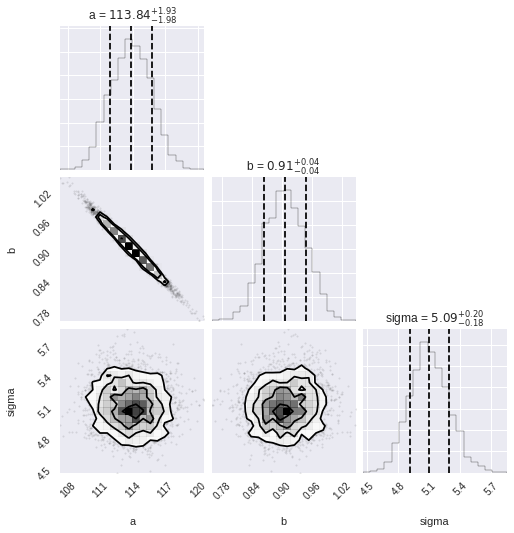

In [693]:
filt=[np.logical_not('_interval__' in k) for k in trace_pred.varnames]
vnames=np.array(trace_pred.varnames)[filt]
trace_array=np.array([trace_pred[i] for i in vnames]).T
corner.corner(trace_array,labels=vnames,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [695]:
pm.summary(trace_pred, alpha=.32).round(2)

,mean,sd,mc_error,hpd_16,hpd_84,n_eff,Rhat
a,113.83,1.89,0.05,112.24,116.07,1318.75,1.0
b,0.91,0.04,0.00,0.86,0.94,1305.97,1.0
sigma,5.10,0.19,0.00,4.92,5.29,2084.40,1.0


In [717]:
weight_c=ds2.weight-ds2.weight.mean()
with pm.Model() as pred_model:
    a=pm.Normal('a',mu=156,sd=100)
    b=pm.Normal('b',mu=0,sd=10)
    mu=a+b*(weight_c)
    sigma=pm.Uniform('sigma',lower=0,upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds2.height)
    trace_pred = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3489.77draws/s]


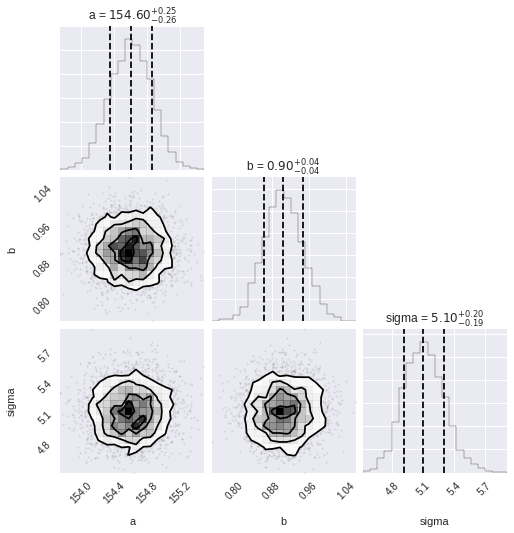

In [718]:
filt=[np.logical_not('_interval__' in k) for k in trace_pred.varnames]
vnames=np.array(trace_pred.varnames)[filt]
trace_array=np.array([trace_pred[i] for i in vnames]).T
corner.corner(trace_array,labels=vnames,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show()

In [719]:
mean_pars=trace_array.mean(axis=0)

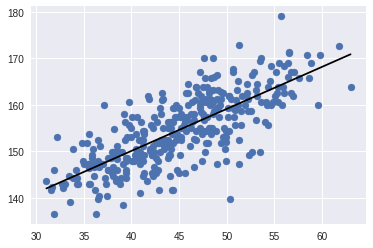

In [720]:
plt.scatter(ds2.weight,ds2.height)
x=np.linspace(weight_c.min(),weight_c.max(),3)
plt.plot(x+ds2.weight.mean(),mean_pars[0]+(x)*mean_pars[1],c='k')


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 2764.95draws/s]


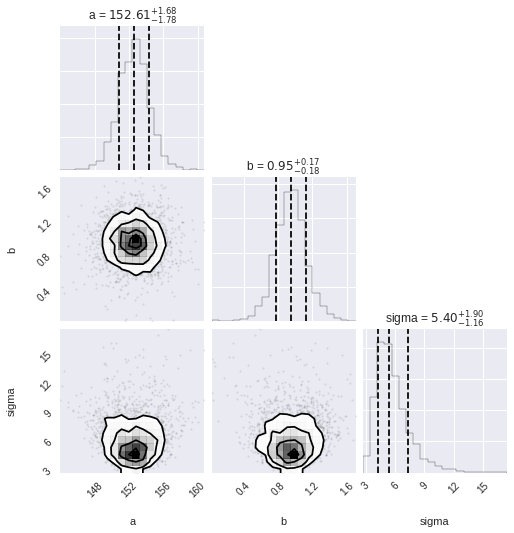

In [767]:
ds3=ds2[:10]
weight_c=ds3.weight-ds3.weight.mean()
with pm.Model() as pred_model:
    a=pm.Normal('a',mu=156,sd=100)
    b=pm.Normal('b',mu=0,sd=10)
    mu = pm.Deterministic('mu', a + b * weight_c)
    sigma=pm.Uniform('sigma',lower=0,upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds3.height)
    trace_pred = pm.sample(1000, tune=1000)
filt1=np.array([np.logical_not('_interval__' in k) for k in trace_pred.varnames])
filt2=np.array([np.logical_not('mu' in k) for k in trace_pred.varnames])
vnames=np.array(trace_pred.varnames)[filt1&filt2]
trace_array=np.array([trace_pred[i] for i in vnames]).T
corner.corner(trace_array,labels=vnames,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show() 

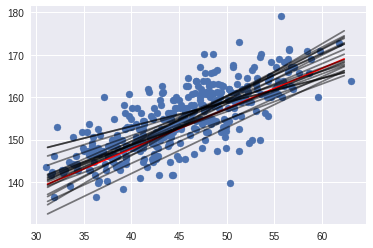

In [768]:
mean_pars=trace_array.mean(axis=0)
plt.scatter(ds2.weight,ds2.height)
x=np.linspace(weight_c.min(),weight_c.max(),3)
plt.plot(x+ds2.weight.mean(),mean_pars[0]+(x)*mean_pars[1],c='r')
for a,b,s in trace_array[np.random.randint(len(trace_array), size=20)]:
    plt.plot(x+ds2.weight.mean(),a+x*b , color="k", alpha=0.5)
plt.show()   

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3718.55draws/s]


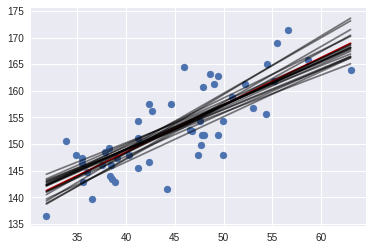

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3414.84draws/s]


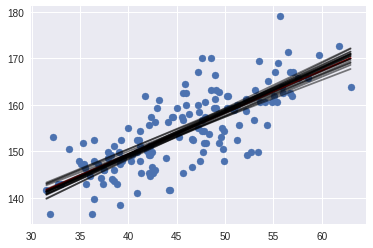

In [758]:
for i in [50,150]:
    ds3=ds2[:i]
    weight_c=ds3.weight-ds3.weight.mean()
    with pm.Model() as pred_model:
        a=pm.Normal('a',mu=156,sd=100)
        b=pm.Normal('b',mu=0,sd=10)
        mu=a+b*(weight_c)
        sigma=pm.Uniform('sigma',lower=0,upper=50)
        height = pm.Normal('height', mu=mu, sd=sigma, observed=ds3.height)
        trace_pred = pm.sample(1000, tune=1000)
    filt=[np.logical_not('_interval__' in k) for k in trace_pred.varnames]
    vnames=np.array(trace_pred.varnames)[filt]
    trace_array=np.array([trace_pred[i] for i in vnames]).T
    mean_pars=trace_array.mean(axis=0)
    plt.scatter(ds3.weight,ds3.height)
    x=np.linspace(weight_c.min(),weight_c.max(),3)
    plt.plot(x+ds3.weight.mean(),mean_pars[0]+(x)*mean_pars[1],c='r')
    for a,b,s in trace_array[np.random.randint(len(trace_array), size=20)]:
        plt.plot(x+ds3.weight.mean(),a+x*b , color="k", alpha=0.5)
    plt.show()    

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
INFO:pymc3:NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:02<00:00, 3179.07draws/s]


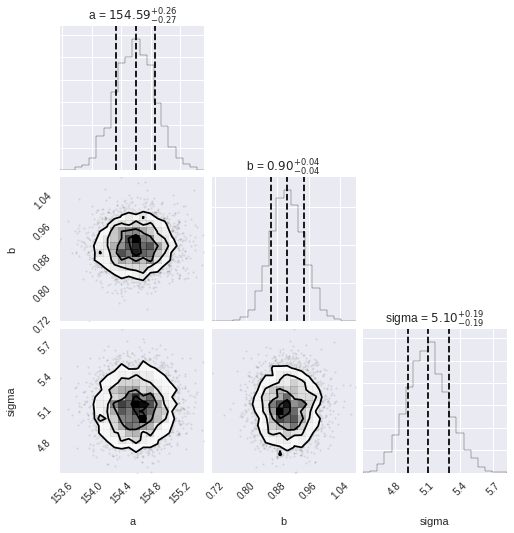

In [769]:
ds3=ds2
weight_c=ds3.weight-ds3.weight.mean()
with pm.Model() as pred_model:
    a=pm.Normal('a',mu=156,sd=100)
    b=pm.Normal('b',mu=0,sd=10)
    mu = pm.Deterministic('mu', a + b * weight_c)
    sigma=pm.Uniform('sigma',lower=0,upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=ds3.height)
    trace_pred = pm.sample(1000, tune=1000)
filt1=np.array([np.logical_not('_interval__' in k) for k in trace_pred.varnames])
filt2=np.array([np.logical_not('mu' in k) for k in trace_pred.varnames])
vnames=np.array(trace_pred.varnames)[filt1&filt2]
trace_array=np.array([trace_pred[i] for i in vnames]).T
corner.corner(trace_array,labels=vnames,quantiles=[0.16, 0.5, 0.84],show_titles=True) 
plt.show() 

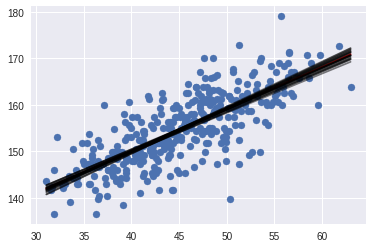

In [770]:
mean_pars=trace_array.mean(axis=0)
plt.scatter(ds2.weight,ds2.height)
x=np.linspace(weight_c.min(),weight_c.max(),3)
plt.plot(x+ds2.weight.mean(),mean_pars[0]+(x)*mean_pars[1],c='r')
for a,b,s in trace_array[np.random.randint(len(trace_array), size=20)]:
    plt.plot(x+ds2.weight.mean(),a+x*b , color="k", alpha=0.5)
plt.show() 

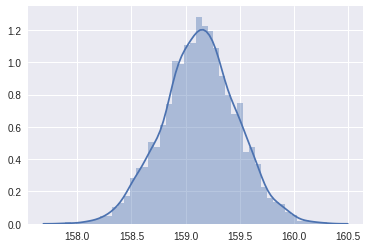

In [751]:
mu_samples=trace_pred['a']+trace_pred['b']*(50-ds2.weight.mean())
sns.distplot(mu_samples) # don't forget to regularize

158.862018985 159.503144324


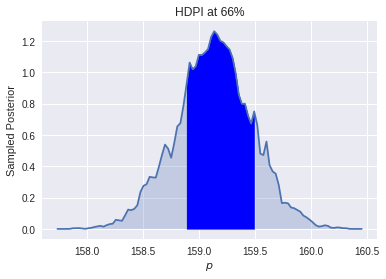

In [755]:
hpdi(mu_samples,0.66)

In [764]:
trace_pred['mu']

array([[ 156.54573973,  146.95783099,  143.05075817, ...,  160.21311483,
         161.81908954,  160.52472186],
       [ 157.72400486,  146.57452229,  142.03110814, ...,  161.98868195,
         163.85622028,  162.35104013],
       [ 156.42242022,  146.84246599,  142.93863464, ...,  160.08675272,
         161.69139505,  160.39810123],
       ..., 
       [ 157.00239429,  146.86150361,  142.72909065, ...,  160.88128498,
         162.57988417,  161.21086393],
       [ 157.57753109,  146.7863895 ,  142.38899931, ...,  161.70514275,
         163.51265896,  162.05585485],
       [ 156.96007335,  146.74185401,  142.57792963, ...,  160.86854224,
         162.58009398,  161.20063437]])

In [829]:
nsamps=100
x=np.arange(25,70)
w_mn=ds3.weight.mean()
dist_mu=np.array([a+b*(x-w_mn) for a,b,c in trace_array[:nsamps]]).T.ravel()
weights=np.array([nsamps*[i] for i in x]).ravel()

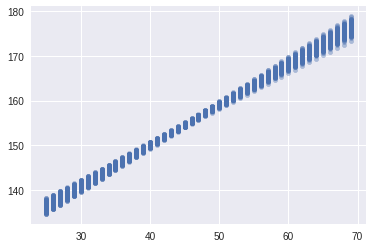

In [830]:
plt.scatter(weights,dist_mu,s=20,alpha=0.4)

In [847]:
arr_hpdi=np.array([hpdi(i,0.89,plot=False) for i in np.array([a+b*(x-w_mn) for a,b,c in trace_array[:nsamps]]).T]);

(30, 65)

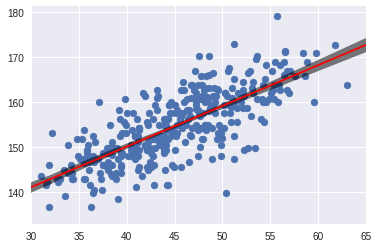

In [848]:
plt.scatter(ds3.weight,ds3.height)
plt.fill_between(x,arr_hpdi[:,0],arr_hpdi[:,1],color='k',alpha=0.5)
plt.plot(x,mean_pars[0]+(x-w_mn)*mean_pars[1],c='r')
plt.xlim(30,65)

In [884]:
nsamps=10000
x=np.linspace(30,65,10000)

In [885]:
ppd_samples=np.array([np.random.normal((a+b*(x-w_mn)),c) for a,b,c in trace_array[:nsamps]]).T

In [886]:
ppd_hpdi=np.array([hpdi(i,0.89,plot=False) for i in ppd_samples])

(30, 65)

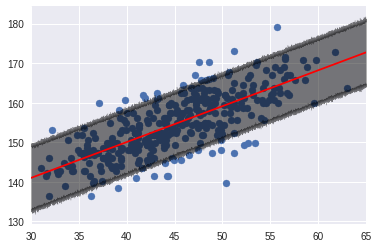

In [887]:
plt.scatter(ds3.weight,ds3.height)
plt.fill_between(x,ppd_hpdi[:,0],ppd_hpdi[:,1],color='k',alpha=0.5)
plt.plot(x,mean_pars[0]+(x-w_mn)*mean_pars[1],c='r')
plt.xlim(30,65)